<a href="https://colab.research.google.com/github/dr-kinder/playground/blob/dev/08-magnetic-fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magnetic Fields and Magnetic Materials

In this tutorial (based on [*this tutorial*](https://jorgensd.github.io/dolfinx-tutorial/chapter3/em.html)), we are going to use the finite element method to explore magnetic fields and magnetic materials.

## The System

The system is a type of coaxial cable: a ring of $N$ wires carry a current into the page and another ring of $N$ wires carry a return current out of the page.  In between the rings of wires is a cylinder made of iron.

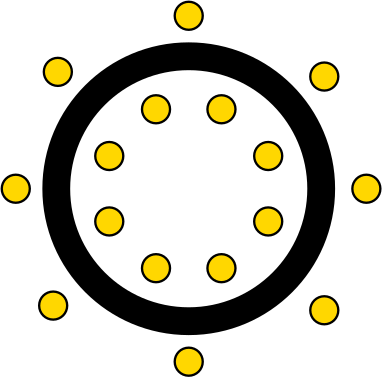

The model below is adjustable, so we will change the number of wires, the current, and the magnetic properties of the cylinder as we explore the fields — and the use of the finite element method!

## Acknowledgements

The installation commands below come from the [FEM on CoLab](https://fem-on-colab.github.io/index.html) project.

This tutorial was adapted from "Electromagnetics example" in [The FEniCSx Tutorial](https://jorgensd.github.io/dolfinx-tutorial/chapter1/fundamentals.html).

Thanks to all of the contributors to these projects!

# Install and Load Packages

These are the commands we use to install FEniCSx, Gmsh, and **multiphenicsx**.

In [1]:
try:
    # Import gmsh library for generating meshes.
    import gmsh
except ImportError:
    # If it is not available, install it.  Then import it.
    !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
    import gmsh

--2022-10-26 12:29:40--  https://fem-on-colab.github.io/releases/gmsh-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2175 (2.1K) [application/x-sh]
Saving to: '/tmp/gmsh-install.sh'

/tmp/gmsh-install.s 100%[===================>]   2.12K  --.-KB/s    in 0s      

2022-10-26 12:29:40 (6.96 MB/s) - '/tmp/gmsh-install.sh' saved [2175/2175]

+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ GMSH_INSTALLED=/usr/local/share/fem-on-colab/gmsh.installed
+ [[ ! -f /usr/local/share/fem-on-colab/gmsh.installed ]]
+ H5PY_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/ac0fe3a/releases/h5py-install.sh
+ [[ https://github.com/fem-on-colab/fem-on-colab.github.io/raw/ac0fe3a/releases/h5py-install.sh == http* ]]
+ H5PY_INSTALL_SCRIPT_DOWNLOAD=http

Connecting to objects.githubusercontent.com (objects.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 643326968 (614M) [application/octet-stream]
Saving to: '/tmp/gcc-install.tar.gz'

/tmp/gcc-install.ta 100%[===================>] 613.52M  5.86MB/s    in 67s     

2022-10-26 12:30:49 (9.20 MB/s) - '/tmp/gcc-install.tar.gz' saved [643326968/643326968]

++++ [[ /tmp/gcc-install.tar.gz != skip ]]
++++ tar -xzf /tmp/gcc-install.tar.gz --strip-components=2 --directory=/usr/local
man: Can't create 'man'
include/: Can't create 'include'
include/c++/: Failed to create dir 'include'
include/c++/12/: Failed to create dir 'include'
include/c++/12/istream: Failed to create dir 'include'
include/c++/12/version: Failed to create dir 'include'
include/c++/12/scoped_allocator: Failed to create dir 'include'
include/c++/12/parallel/: Failed to create dir 'include'
include/c++/12/parallel/parallel.h: Failed to create dir 'include'
include/c

include/c++/12/ext/pb_ds/detail/bin_search_tree_/erase_fn_imps.hpp: Failed to create dir 'include'
include/c++/12/ext/pb_ds/detail/bin_search_tree_/iterators_fn_imps.hpp: Failed to create dir 'include'
include/c++/12/ext/pb_ds/detail/bin_search_tree_/traits.hpp: Failed to create dir 'include'
include/c++/12/ext/pb_ds/detail/bin_search_tree_/split_join_fn_imps.hpp: Failed to create dir 'include'
include/c++/12/ext/pb_ds/detail/bin_search_tree_/rotate_fn_imps.hpp: Failed to create dir 'include'
include/c++/12/ext/pb_ds/detail/bin_search_tree_/node_iterators.hpp: Failed to create dir 'include'
include/c++/12/ext/pb_ds/detail/bin_search_tree_/point_iterators.hpp: Failed to create dir 'include'
include/c++/12/ext/pb_ds/detail/bin_search_tree_/debug_fn_imps.hpp: Failed to create dir 'include'
include/c++/12/ext/pb_ds/detail/bin_search_tree_/bin_search_tree_.hpp: Failed to create dir 'include'
include/c++/12/ext/pb_ds/detail/bin_search_tree_/find_fn_imps.hpp: Failed to create dir 'include'
in

bin/gcc-ranlib-12: Can't create 'bin/gcc-ranlib-12'
bin/gcov-tool-12: Can't create 'bin/gcov-tool-12'
bin/x86_64-linux-gnu-gcc-tmp: Can't create 'bin/x86_64-linux-gnu-gcc-tmp'
bin/gcc: Can't create 'bin/gcc'
bin/x86_64-linux-gnu-g++-12: Can't create 'bin/x86_64-linux-gnu-g++-12'
bin/cpp: Can't create 'bin/cpp'
bin/x86_64-linux-gnu-gcc-ar: Can't create 'bin/x86_64-linux-gnu-gcc-ar'
bin/gcc-nm: Can't create 'bin/gcc-nm'
bin/x86_64-linux-gnu-gfortran-12: Can't create 'bin/x86_64-linux-gnu-gfortran-12'
bin/gcc-ar-12: Can't create 'bin/gcc-ar-12'
bin/x86_64-linux-gnu-gcc: Can't create 'bin/x86_64-linux-gnu-gcc'
bin/x86_64-linux-gnu-g++: Can't create 'bin/x86_64-linux-gnu-g++'
bin/gcc-ranlib: Can't create 'bin/gcc-ranlib'
bin/gfortran-12: Hard-link target 'bin/x86_64-linux-gnu-gfortran-12' does not exist.
bin/gcov-tool: Can't create 'bin/gcov-tool'
bin/gfortran: Can't create 'bin/gfortran'
bin/c++: Can't create 'bin/c++'
bin/gcov-dump: Can't create 'bin/gcov-dump'
bin/gcov: Can't create 'bin

lib/gcc/x86_64-linux-gnu/12/finclude/openacc.f90: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/finclude/omp_lib.mod: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/finclude/ieee_arithmetic.mod: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/crtprec64.o: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/crtbeginT.o: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/libgcc.a: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/crtprec80.o: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/include-fixed/: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/include-fixed/syslimits.h: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/include-fixed/limits.h: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/include-fixed/README: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/libgcc_eh.a: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/libgcov.a: Failed to create dir 'lib'
lib/gcc/x86_64-linux-gnu/12/crtprec32.o: Failed t

ModuleNotFoundError: No module named 'gmsh'

In [ ]:
try:
    # Import FEniCSx libraries for finite element analysis.
    import dolfinx
except ImportError:
    # If they are not found, install them.  Then import them.
    !wget "https://fem-on-colab.github.io/releases/fenicsx-install-real.sh" -O "/tmp/fenicsx-install.sh" && bash "/tmp/fenicsx-install.sh"
    import dolfinx

In [ ]:
try:
    # Import multiphenicsx, mainly for plotting.
    import multiphenicsx
except ImportError:
    # If they are not found, install them.
    !pip3 install "multiphenicsx@git+https://github.com/multiphenics/multiphenicsx.git@8b97b4e"
    import multiphenicsx

Everything we need should be installed now!

If you "Restart runtime" from the "Runtime" menu, all of your data will be reset, but the packages will remain installed.

Let's load the packages we need, and get started!

In [ ]:
# Everything should be installed now.
# Import the rest of what we need.

import dolfinx.fem
import dolfinx.io
import gmsh
import mpi4py.MPI
import numpy as np
import petsc4py.PETSc
import ufl
import multiphenicsx.fem
import multiphenicsx.io

# Inputs

In [ ]:
## Adjust this cell to change the geometry:
# Specify sizes of the objects
# and adjust material properties.

# Geometric dimension of the mesh
dim = 2


## Background
# Radius of the entire domain
r_background = 5

# Magnetic permeability (relative) of background medium
mu_background = 1


## Wires
# Radius of individual wires
r_wire = 0.1

# Location of centers of inner and outer rings of wires.
centers_inner = 0.8 
centers_outer = 1.4 

# Number of wires.
N = 6

# Magnetic permeability (relative) of wires.
mu_wire = 1

# Current density in each wire.
J0 = 1.0


## Ring
# Inner and outer radii of ring
ring_inner = 1     
ring_outer = 1.2

# Magnetic permeability (relative) of ring.
mu_ring = 10

# Concstruct the Model

The physical system is a type of coaxial cable: a ring of $N$ wires carry a current into the page and another ring of $N$ wires carry a return current out of the page.  In between the rings of wires is a cylinder made of iron.

The geometric model is a collection of circles.  The code below draws them all, and then combines them into a single mesh.

In [ ]:
# Create a model.
gmsh.initialize()
gmsh.model.add("mesh")

# Define the system: a large disk.
background = gmsh.model.occ.addDisk(0, 0, 0, r_background, r_background)
gmsh.model.occ.synchronize()

# Define geometry for the ring.
outer_ring = gmsh.model.occ.addCircle(0, 0, 0, ring_outer)
inner_ring = gmsh.model.occ.addCircle(0, 0, 0, ring_inner)
gmsh.model.occ.addCurveLoop([outer_ring], 5)
gmsh.model.occ.addCurveLoop([inner_ring], 6)
ring = gmsh.model.occ.addPlaneSurface([5, 6])
gmsh.model.occ.synchronize()

# Create two list of circular disks to represent the wires.
# Define the wires inside the ring.
angles_in = [n * 2*np.pi/N for n in range(N)]
wires_in = [(2,
            gmsh.model.occ.addDisk(centers_inner * np.cos(v),
            centers_inner * np.sin(v), 0, r_wire, r_wire))
            for v in angles_in]

# Define the wires outside the ring.
angles_out = [(n + 0.5) * 2*np.pi/N for n in range(N)]
wires_out = [(2,
            gmsh.model.occ.addDisk(centers_outer * np.cos(v),
            centers_outer * np.sin(v), 0, r_wire, r_wire))
            for v in angles_out]

# Update the model.
gmsh.model.occ.synchronize()

# Resolve the boundaries of the wires and ring in the background domain.
all_surfaces = [(2, ring)]
all_surfaces.extend(wires_in)
all_surfaces.extend(wires_out)
whole_domain = gmsh.model.occ.fragment([(2, background)], all_surfaces)

# Update the model.
gmsh.model.occ.synchronize()

# Create physical markers for each object.
# Use the following markers:
# - Vacuum: 0
# - Ring: 1
# - Inner wires: $[2,3,\dots,N+1]$
# - Outer wires: $[N+2,\dots, 2\cdot N+1]$
inner_tag = 2
outer_tag = 2 + N
background_surfaces = []
other_surfaces = []

# Gmsh can compute the mass of objects and the location of their
# centers of mass.  This loop uses these properties to determine
# which object to associate grid points with.
# 
# We will use these tags to define material properties later.
for domain in whole_domain[0]:
    center = gmsh.model.occ.getCenterOfMass(domain[0], domain[1])
    mass = gmsh.model.occ.getMass(domain[0], domain[1])

    # Identify the ring by its mass.
    # Check for ring first, because center of mass is same as background.
    if np.isclose(mass, np.pi*(ring_outer**2 - ring_inner**2)):
        gmsh.model.addPhysicalGroup(domain[0], [domain[1]], tag=1)
        other_surfaces.append(domain)
    
    # Identify the background circle by its center of mass
    elif np.allclose(center, [0, 0, 0]):
        background_surfaces.append(domain[1])

    # Identify the inner wires by their centers of mass.
    elif np.isclose(np.linalg.norm(center), centers_inner):
        gmsh.model.addPhysicalGroup(domain[0], [domain[1]], inner_tag)
        inner_tag +=1
        other_surfaces.append(domain)

    # Identify the outer wires by their center of mass.
    elif np.isclose(np.linalg.norm(center), centers_outer):
        gmsh.model.addPhysicalGroup(domain[0], [domain[1]], outer_tag)
        outer_tag +=1
        other_surfaces.append(domain)

# Add marker for the vacuum.
gmsh.model.addPhysicalGroup(2, background_surfaces, tag=0)

# Create mesh resolution that is fine around the wires and
# make the grid coarse further away from the ring.
gmsh.model.mesh.field.add("Distance", 1)
edges = gmsh.model.getBoundary(other_surfaces, oriented=False)
gmsh.model.mesh.field.setNumbers(1, "EdgesList", [e[1] for e in edges])
gmsh.model.mesh.field.add("Threshold", 2)
gmsh.model.mesh.field.setNumber(2, "IField", 1)
gmsh.model.mesh.field.setNumber(2, "LcMin", r_wire / 2)
gmsh.model.mesh.field.setNumber(2, "LcMax", 5 * r_wire)
gmsh.model.mesh.field.setNumber(2, "DistMin", 2 * r_wire)
gmsh.model.mesh.field.setNumber(2, "DistMax", 4 * r_wire)
gmsh.model.mesh.field.setAsBackgroundMesh(2)
gmsh.option.setNumber("Mesh.Algorithm", 7)

# Create a mesh for this system.
gmsh.model.mesh.generate(dim)

# Bring the mesh into FEniCSx.
mesh, subdomains, boundaries = dolfinx.io.gmshio.model_to_mesh(
    gmsh.model, comm=mpi4py.MPI.COMM_WORLD, rank=0, gdim=2)

gmsh.finalize()

In [ ]:
# Plot the entire mesh.
multiphenicsx.io.plot_mesh(mesh)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [ ]:
# Plot the subdomains that FEniCSx has identified.
# There should only be one for this model.
multiphenicsx.io.plot_mesh_tags(subdomains)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

# Finite Element Method

Now it is time to tell FEniCSx the problem we want to solve on this mesh.

You can vary the using the cells above geometry above.  The cell below allows you to specify the boundary conditions along the 4 edges.

In the language of finite elements, an ***essential boundary condition*** specifies the value of the function on a boundary.  A ***natural boundary condtions*** specifies the derivative.

In [ ]:
# This loop will assign material properties to each cell in our model.
# In this case, it is the relative magnetic permeability and current density.

# Define a simple function space for properties.
Q = dolfinx.fem.FunctionSpace(mesh, ("DG", 0))

# Get the list of materials.
material_tags = np.unique(subdomains.values)

# Define functions for current density and magnetic permeability.
mu = dolfinx.fem.Function(Q)
J = dolfinx.fem.Function(Q)

# Only some regions carry current. Initialize all current densities to zero.
J.x.array[:] = 0.0

# Now, cycle over all objects and assign material properties. 
for tag in material_tags:
    cells = subdomains.find(tag)
    
    # Set values for magnetic permeability.
    if tag == 0:
        # Vacuum
        mu_ = mu_background
    elif tag == 1:
        # Ring
        mu_ = mu_ring
    else:
        # Wire
        mu_ = mu_wire

    mu.x.array[cells] = np.full_like(cells, mu_, dtype=petsc4py.PETSc.ScalarType)
    
    # Set nonzero current densities.
    if tag in range(2, 2+N):
        J.x.array[cells] = np.full_like(cells, J0, dtype=petsc4py.PETSc.ScalarType)
    elif tag in range(2+N, 2*N + 2):
        J.x.array[cells] = np.full_like(cells, -J0, dtype=petsc4py.PETSc.ScalarType)

In [ ]:
## Set up the finite element problem.

# Define trial and test functions.
V = dolfinx.fem.FunctionSpace(mesh, ("Lagrange", 2))

# Define the trial and test functions.
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

# Create a function to store the solution.
# This is the vector potential.  A_x = A_y = 0.
A_z = dolfinx.fem.Function(V)

# Identify the domain and boundary.
D = mesh.topology.dim
Omega = dolfinx.mesh.locate_entities_boundary(mesh, D-1, lambda x: np.full(x.shape[1], True))
dOmega = dolfinx.fem.locate_dofs_topological(V, D-1, Omega)

# Force the potential to vanish on the boundary.
bc = dolfinx.fem.dirichletbc(petsc4py.PETSc.ScalarType(0), dOmega, V)

# Define the Poisson equation we are trying to solve.
a = (1 / mu) * ufl.inner(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = 4 * ufl.pi * J * v * ufl.dx

# Define the problem.
problem = dolfinx.fem.petsc.LinearProblem(a, L, u=A_z, bcs=[bc])

# Solve the problem.
problem.solve()

Coefficient(FunctionSpace(Mesh(VectorElement(Basix element (P, triangle, 1, equispaced, unset, False), 2), 7), Basix element (P, triangle, 2, gll_warped, unset, False)), 34)

In [ ]:
# Compute the magnetic field.
W = dolfinx.fem.VectorFunctionSpace(mesh, ("CG", 2))
B = dolfinx.fem.Function(W)
B_expr = dolfinx.fem.Expression(ufl.as_vector((A_z.dx(1), -A_z.dx(0))), W.element.interpolation_points())
B.interpolate(B_expr)

# Results

In [ ]:
# Plot the vector potential.
multiphenicsx.io.plot_scalar_field(A_z,"Vector Potential", warp_factor=1)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [ ]:
# Plot the magnetic field.
multiphenicsx.io.plot_vector_field(B,"Magnetic Field", glyph_factor=0.2)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

# Experiments

Change the inputs above and run the cells to carry out the following experiments.

## 1. Hit Play

Run the cells above with the default inputs.  (There is a copy of the default inputs in the cell at the bottom of the notebook.)

- Describe the vector potential.
- Describe the magnetic field.



The vector potential looks like a hat with a large brim. It clearly shows the outer ring of wires pushing into the page and the inner ring pointing out. The magentic cylinder appears to perfectly isolate the two sets of wires resulting in a near perfect round shape.

The magnetic field vector very clearly shows each cable as well as the direction of current flow. Each cable has a resulting magentic field vector rotating around it, each one nearly identical to the next. The onlt difference is the direction, which of course corresponds to the direction of the current flow using the right hand rule. It is interesting to see how the magetic field of an external wire and an interal wire both feed into eachother, resulting in what looks like a larger magnetic field rotating around the magentic cylinder in the counter clockwise direction.



## 2. Simplify

There is a lot going on in this model.  Let's focus on the field of the wires first.
- Set `N=2`.  This will reduce the simulation to 2 pairs of wires.
- Set `mu_ring = 1`.  This will make the ring have the same permeability as the background — effectively removing it from the system.

Use your knowledge of magnetic fields and Laplace's equation to predict the field pattern.

- What will the vector potential look like?
- What will the field look like around the individual wires?
- Where will the field be the strongest?  The weakest?

I expect to see the round disc with 2 purple and 2 ywllos wires since it says we are reducing to 2 pairs. There shpould be 4. There wont be the hat like shape since the cylinder is removed and that appeared to be the source of the shape. round individual wires i expect a single bump, 2 purple and 2 yellow, like a point charge. the field will be the strongest directly at the wire location and the weakest at the outsides of the disk.

Now run the simulation again.  Inspect the model, the vector potential, and the magnetic field.

- What features are consistent with your predictions?
- What features were surprising?

The disk looks like I had thought it would, except that there was a little more field between the 2 yellow wires than i had thought there would be. i was thinking everything would be cancelled out, but i didnt take into account the positions of the wires. 

## 3. Coaxial Cable

Let's use this simulation to model a coaxial cable.  We can increase the number of wires to some large value to simulate to concentric conducting cylinders — one carrying a current into the plane of your monitor and one carrying an equal current out.

- Set `N` to something between 20 and 100.
- Set `mu_ring = 1`.  This will make the ring have the same permeability as the background — effectively removing it from the system.

Use your knowledge of magnetic fields and Laplace's equation to predict the field pattern.

- What will the vector potential look like?
- What will the field look like around the individual wires?
- Where will the field be the strongest?  The weakest?

I except it to look like it did in experiment 1 with the ring. A hat with a large brim. 

I think the field around the individual wires will look like small circles, adding up to a signle large field like they did with the magentic cylinder.

I think the field will be wakest in the center and the far outside.



Now run the simulation again.  Inspect the model, the vector potential, and the magnetic field.

- What features are consistent with your predictions?
- What features were surprising?

It for the most part looks like i thought it would, a hat shape. However, what i didnt predict was the large potential on the far outside of the circle. the entire thing looks like a fountain now. This was suprising to me, as i didnt expect that. The field turned out to be weakest at a distance around R/2, which i did not predict. 

The vector field does looks about like i expected, with all th individual fields feeding a larger one. 

## 4. Iron Ring

Let's explore the effect of the ring now.  The relative permeability of carbon steel is $\mu \approx 10$ — the default value.  However, the relative permeability of soft iron is much larger: $\mu > 5000$.  Such large values make the plots difficult to interpret, but let's explore the effect of changing $mu$.

- Set `N=2` for 2 pairs of wires.
- Set `mu_ring = 2`.

Use your knowledge of magnetic fields and Laplace's equation to predict the field pattern.

- You simulated a similar system in Experiment #2.  How will the ring affect the field?
- What will the vector potential look like?
- What will the field look like around the individual wires?
- Where will the field be the strongest?  The weakest?

I thing the ring will increase the field strength around the center, forming the cylinder shape again. It seems to help the different fields from the wires combine into a stronger larger field. 

i think the field around the individual wires will look like small circles, adding together with the opposing wire. 

I think the field will be the strongest at the ceter, and the weakest on the ouside of the ring like it was before. 

Now run the simulation again.  Inspect the model, the vector potential, and the magnetic field.

- What features are consistent with your predictions?
- What features were surprising?

This did not turn out like i predicted, probably because the µ value was still so low. This looks almsot like it did when it was just 2 pairs of wires. There appears to be a small contribution from the cylinder, but not much.

Repeat the simulation for different values of $\mu$:
- $\mu=5$
- $\mu=10$
- $\mu=100$
- $\mu=5000$

Inspect the model, the vector potential, and the magnetic field.

Summarize the effect of a permeable ring between the wires.

µ = 5
There hat like shape I initially expected is beggining to form. The individual wires are beggining to contribute to a larger overall field within the cylinder.

µ = 10
Just like before, but slightly stronger. The center cylinder shape is more pronounced.

µ = 100
For the m ost part everything still looks the same, however, the cylinder is extremely tall now. The strength of the field is starting to amplify a great deal. The vector field shows the magnitude has increased a low, and that the whole field has an overall counterclockwise spin. 

µ = 5000
The center cylinder has grown massively here, with the potential still confined to the center. The vector field has overtaken the entire circle in a massive yellow counterclockwise field.

## 5. Your Choice

Carry out your own experiments with the simulation.  Change the current, the number of wires, the size of the iron ring, the permeability of the wires — or explore your own ideas.

Describe your procedure and your observations.

When the µ of the wires is set to a high value, such as 20, it forms large conical sections, much like with the cylinder ring, just contained to the width of the wire. This in turn makes the vector field nearly impossible to interpret as the large vectors for the center compleltly cover the smaller ones that would be able to demonstrate direction.

Adding more of these wires with the high µ creates a very interesting shape, where the wires look like sets of spikes and form a shape reminiscent of a semi trucks from tires when someone installs those ridiculous spiked lug nuts. 

Setting the number of pairs to 200 results in the mesh not forming, and the program crashing in collab. setting the wire µ to 200 just makes the spikes longer, and the vector field turns into a massive circular monstrosity with a few large arrows dominating the entire thing. It looks like how a 5 year old draws the sun with large rays.   

# Challenge

## Single Wire

Tinker with the model code.  See if you can create a single large wire.

Compute the vector potential and magnetic field inside and outside the wire.

## Solenoid

You can simulate a cross section of a solenoid by arranging the wires in straight lines instead of concentric rings.  

Try to create a model for an electromagnet with an iron core.

***Replace with your procedure and observations.***

# Reflection and Summary

- What are the major takeaways of this assignment for you?
- What was the most difficult part of this assignment?
- What was the most interesting part of this assignment?
- What questions do you have?

The key takeaways are how much the µ value of the material effects the magetic field. Is this how an electromagnet works? It seems that the ring could be seen as a large electromagnet. The most difficult part of this assigment was collab crashing when I wanted to try massive variables. Going to the extremes and working down helpos me interpret what I am seeing better. This entire assignment was interesting, getting to visualize the magnetic field in 3D is incredibly helpful. 



## Default Inputs

In [ ]:
## Adjust this cell to change the geometry:
# Specify sizes of the objects
# and adjust material properties.

# Geometric dimension of the mesh
dim = 2


## Background
# Radius of the entire domain
r_background = 5

# Magnetic permeability (relative) of background medium
mu_background = 1


## Wires
# Radius of individual wires
r_wire = 0.1

# Location of centers of inner and outer rings of wires.
centers_inner = 0.8 
centers_outer = 1.4 

# Number of wires.
N = 6

# Magnetic permeability (relative) of wires.
mu_wire = 1

# Current density in each wire.
J0 = 1.0


## Ring
# Inner and outer radii of ring
ring_inner = 1     
ring_outer = 1.2

# Magnetic permeability (relative) of ring.
mu_ring = 10